In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

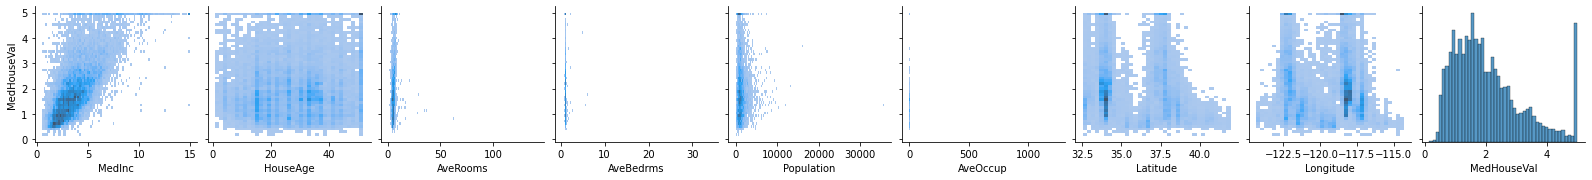

In [35]:
# Plotten der Feature gegenüber der Hauswerte
# TODO
# sns.pairplot(X.ssign(id=y), hue='id')
Z = X.assign(MedHouseVal=y)

sns.pairplot(data=Z, y_vars='MedHouseVal', kind='hist')

In [36]:
# Führen Sie ein 80-20 Train-Test-Split durch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [37]:
# Kümmeren Sie sich nun um eine entsprechende Datenskalierung

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

 # Salierung mit Erhaltung der Labels

X_train_scaled[X_train.keys()] = scaler.fit_transform(X_train)
X_test_scaled[X_train.keys()] = scaler.transform(X_test)



In [38]:
# Trainieren Sie ein lineares Regressionsmodell mit nur einem Feature ihrere Wahl. 
# Begründen Sie Ihre Featureauswahl!

# Naja, ich weiß ja eigentlich nichts über das Haus außer seine Lage. Allerdings wären das ja hier zwei Features. Ich kann also noch am ehesten eine Aussage über den Preis treffen in dem ich die Anzahl an Zimmern approximiere.


liRe = LinearRegression(n_jobs=-1).fit(np.array(X_train_scaled.AveRooms).reshape(-1,1), y_train)

# Scoring


prediction = liRe.predict(np.array(X_test_scaled.AveRooms).reshape(-1,1))


print(f'MSE: {mean_squared_error(y_test, prediction)}')

print(f'R2: {r2_score(y_test, prediction)}')


MSE: 1.29233144408073
R2: 0.01379533753228468


In [39]:
# Plotten Sie ihrer Regressionsgerade in den entsprechenden Featureraum
# TODO
liRe.coef_

array([0.18323882])

In [40]:
# Trainieren Sie ein lineares Regressionsmodell mit allen Featuren

liReAll = LinearRegression(n_jobs=-1).fit(X_train, y_train)

# Scoring


prediction = liReAll.predict(X_test)


print(f'MSE: {mean_squared_error(y_test, prediction)}')

print(f'R2: {r2_score(y_test, prediction)}')

MSE: 0.5558915986952441
R2: 0.575787706032451


In [41]:
# Trainieren Sie ein kNN-Regressor mit allen Featuren
# Wählen Sie den Nachbarschaftsparameter entsprechend aus

regressors = [KNeighborsRegressor(n_neighbors=n, n_jobs=-1) for n in range(1, 200)] # Erzeuge Regressors

scores = []
# Fitte Classifiers und Scoring
for regressor in tqdm(regressors):
    
    regressor.fit(X_train_scaled, y_train)

    prediction = regressor.predict(X_test_scaled)
    
    scores.append([mean_squared_error(y_test, prediction), r2_score(y_test, prediction)])

# Scoring







  0%|          | 0/199 [00:00<?, ?it/s]

[Text(0.5, 1.0, 'Der minimale MSE liegt bei 0.41628900457117474 und wird erreicht bei n=12')]

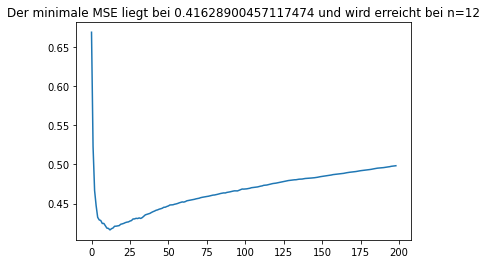

In [47]:
# Plot MSE Score
mse = [score[0] for score in scores]

sns.lineplot(data=mse).set(title=f'Der minimale MSE liegt bei {min(mse)} und wird erreicht bei n={mse.index(min(mse))}')


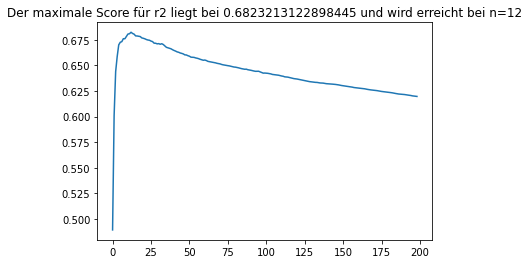

In [46]:
# Plot R2 Score
r2 = [score[1] for score in scores]

sns.lineplot(data=r2).set(title=f'Der maximale Score für r2 liegt bei {max(r2)} und wird erreicht bei n={r2.index(max(r2))}')


# Diskussion

Die Verwendung von Knn zeigt eine maximale Effektivität bei n = 12, wie an den Plots zu erkennen. Hier erreichen wir den geringsten Fehler und die höhsten Score. Dabei übertreffen die Ergebnisse sogar die der linearen Regression.